[*********************100%***********************]  1 of 1 completed


Downloaded 562 days of Apple data
Calculating gaps and signals...
Running backtest...

APPLE VAGR STRATEGY RESULTS
Starting Capital: $10,000
Final Capital: $10,020.86
Total Return: 0.21%
Total Trades: 16
Win Rate: 56.25%
Average Gap: -0.001
Average Volatility: 0.017

Example Trades:
2022-02-24: Long, Gap: -0.047, Return: 0.07
2022-07-29: Long, Gap: 0.025, Return: -0.01
2022-12-13: Long, Gap: 0.035, Return: 0.03
2023-02-02: Long, Gap: 0.024, Return: -0.01
2023-04-10: Long, Gap: -0.020, Return: 0.00
2023-05-05: Long, Gap: 0.031, Return: -0.02
2023-08-04: Long, Gap: -0.030, Return: -0.02
2023-09-07: Long, Gap: -0.042, Return: 0.01
2023-11-03: Long, Gap: -0.019, Return: 0.01
2023-12-11: Long, Gap: -0.013, Return: 0.00


/opt/miniconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


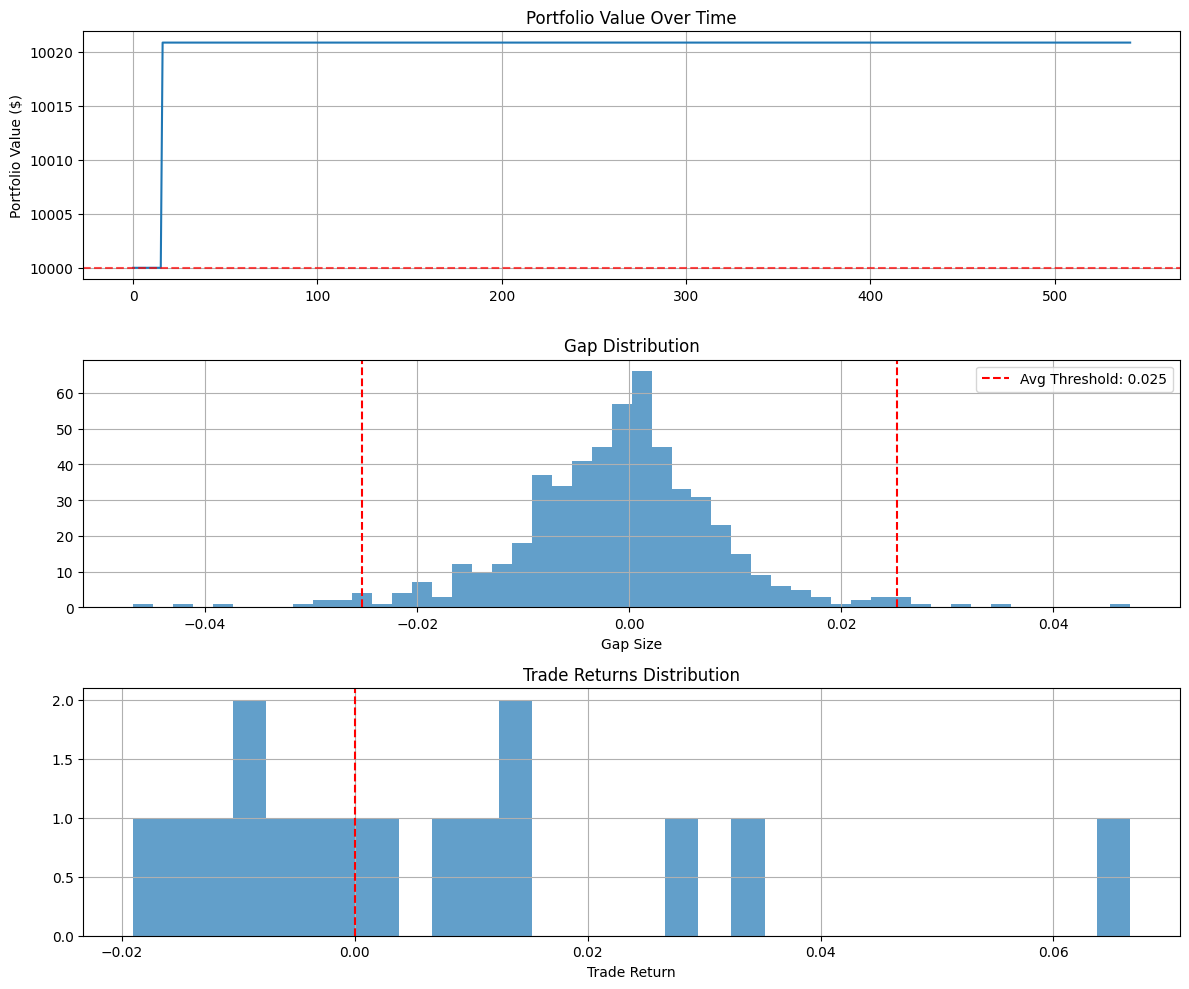

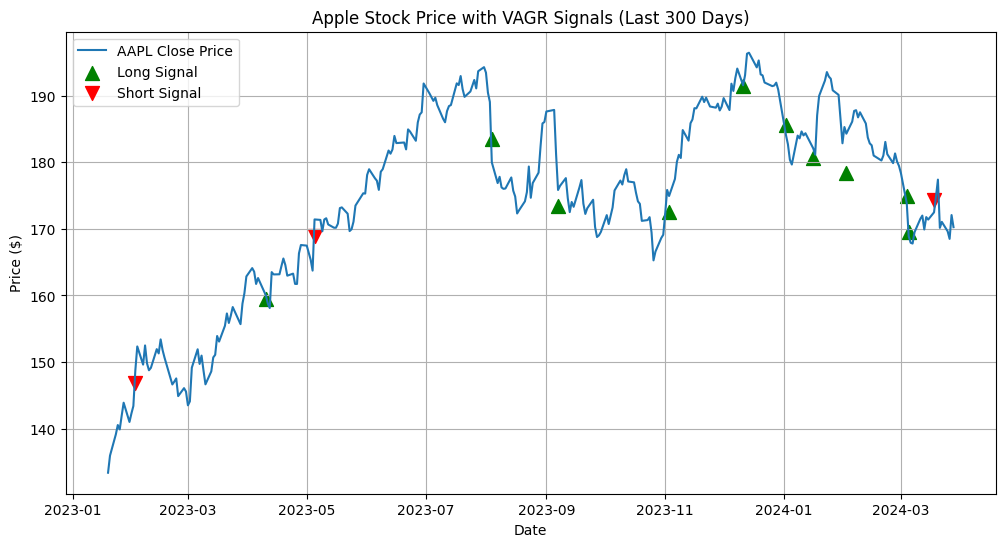

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Downloading Apple data...")
data = yf.download('AAPL', start='2022-01-01', end='2024-03-30', auto_adjust=True)
print(f"Downloaded {len(data)} days of Apple data")
print("Calculating gaps and signals...")
data['Gap'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)
data['Volatility'] = data['Close'].pct_change().rolling(20).std()
data['Gap_Threshold'] = data['Volatility'] * 1.5
data['Signal'] = 0
data.loc[data['Gap'] < -data['Gap_Threshold'], 'Signal'] = 1   
data.loc[data['Gap'] > data['Gap_Threshold'], 'Signal'] = -1   
data['Intraday_Return'] = (data['Close'] - data['Open']) / data['Open']
data['Trade_Return'] = data['Signal'] * data['Intraday_Return']
data = data.iloc[20:]
print("Running backtest...")
capital = 10000
portfolio_values = [capital]

for i in range(len(data)):
    signal = int(data.iloc[i]['Signal'].iloc[0])
    row = data.iloc[i]

    if signal != 0:
             if int(row['Signal'].iloc[0]) != 0:  
                position_size = 0.02
                trade_return = row['Trade_Return']
                trade_pnl = capital * position_size * trade_return
                capital += trade_pnl

    portfolio_values.append(capital)
total_return = (capital - 10000) / 10000
num_trades = len(data[data['Signal'] != 0])
winning_trades = len(data[data['Trade_Return'] > 0])
win_rate = winning_trades / num_trades if num_trades > 0 else 0
print("\n" + "="*40)
print("APPLE VAGR STRATEGY RESULTS")
print("="*40)
print(f"Starting Capital: $10,000")
print(f"Final Capital: ${pd.Series(capital).iloc[0]:,.2f}")
print(f"Total Return: {pd.Series(total_return).iloc[0]:.2%}")
print(f"Total Trades: {num_trades}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Average Gap: {data['Gap'].mean():.3f}")
print(f"Average Volatility: {data['Volatility'].mean():.3f}")
print(f"\nExample Trades:")
trades = data[data['Signal'] != 0][['Gap', 'Signal', 'Intraday_Return', 'Trade_Return']].head(10)
for date, row in trades.iterrows():
    signal_type = "Long" if int(row['Signal'].iloc[0]) != 0 else "Short"
    print(f"{date.strftime('%Y-%m-%d')}: {signal_type}, Gap: {row['Gap'].iloc[0]:.3f}, Return: {row['Trade_Return'].iloc[0]:,.2f}")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
ax1.plot(np.array(portfolio_values[1:], dtype=object))  
ax1.axhline(y=10000, color='r', linestyle='--', alpha=0.7)
ax1.set_title('Portfolio Value Over Time')
ax1.set_ylabel('Portfolio Value ($)')
ax1.grid(True)
ax2.hist(data['Gap'].dropna(), bins=50, alpha=0.7)
avg_threshold = data['Gap_Threshold'].mean()
ax2.axvline(x=avg_threshold, color='r', linestyle='--', label=f'Avg Threshold: {avg_threshold:.3f}')
ax2.axvline(x=-avg_threshold, color='r', linestyle='--')
ax2.set_title('Gap Distribution')
ax2.set_xlabel('Gap Size')
ax2.legend()
ax2.grid(True)
trade_returns = data[data['Signal'] != 0]['Trade_Return']
if len(trade_returns) > 0:
    ax3.hist(trade_returns, bins=30, alpha=0.7)
    ax3.axvline(x=0, color='r', linestyle='--')
    ax3.set_title('Trade Returns Distribution')
    ax3.set_xlabel('Trade Return')
    ax3.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
recent_data = data[-300:]  #
plt.plot(recent_data.index, recent_data['Close'], label='AAPL Close Price')
buy_signals = recent_data[recent_data['Signal'] == 1]
sell_signals = recent_data[recent_data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Open'], color='green', marker='^', s=100, label='Long Signal')
plt.scatter(sell_signals.index, sell_signals['Open'], color='red', marker='v', s=100, label='Short Signal')
plt.title('Apple Stock Price with VAGR Signals (Last 300 Days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()